In [32]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

In [33]:
# read in the data
data = pd.read_csv("shm_data.csv")
length_training = data.loc[:, "Length"].to_numpy()
print(length_training.shape)
period_training = data.loc[:, "Period"].to_numpy()

(999,)


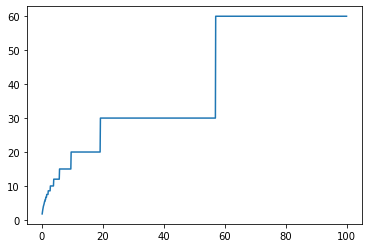

In [34]:
# curious to see how a plot of this looks
plt.plot(length_training, period_training)
# ok... something has gone wrong with the dataset
# we can fix that later
# let's build the model while we're here

In [54]:
# build the model
tf.random.set_seed(71)

model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(1, activation="linear")
])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 10):
            self.model.stop_training = True

stopCallback = haltCallback()

model.fit(tf.expand_dims(length_training, axis=1), tf.expand_dims(period_training, axis=1), epochs=2000, callbacks=[stopCallback])

Epoch 1/2000
32/32 [==============================] - 0s 609us/step - loss: 31.9924 - mae: 31.9924
Epoch 2/2000
32/32 [==============================] - 0s 578us/step - loss: 30.8717 - mae: 30.8717
Epoch 3/2000
32/32 [==============================] - 0s 524us/step - loss: 32.7519 - mae: 32.7519
Epoch 4/2000
32/32 [==============================] - 0s 520us/step - loss: 29.6063 - mae: 29.6063
Epoch 5/2000
32/32 [==============================] - 0s 640us/step - loss: 26.7342 - mae: 26.7342
Epoch 6/2000
32/32 [==============================] - 0s 609us/step - loss: 29.4312 - mae: 29.4312
Epoch 7/2000
32/32 [==============================] - 0s 531us/step - loss: 32.9973 - mae: 32.9973
Epoch 8/2000
32/32 [==============================] - 0s 564us/step - loss: 31.6600 - mae: 31.6600
Epoch 9/2000
32/32 [==============================] - 0s 588us/step - loss: 26.0973 - mae: 26.0973
Epoch 10/2000
32/32 [==============================] - 0s 586us/step - loss: 26.6106 - mae: 26.6106
Epoch 11/

In [55]:
# let's see how the model does
print(model.predict([0.001]))
# at least it's smaller than 0.1...
print((model.predict([900])))
# need to fix issues with training data...
# something about the numerical integration is wacky

1/1 [==============================] - 0s 44ms/step
[[4.4085045]]
1/1 [==============================] - 0s 46ms/step
[[188.12387]]


1/1 [==============================] - 0s 18ms/step


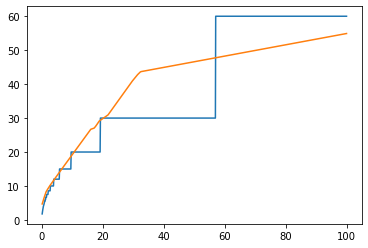

In [56]:
plt.plot(length_training, period_training)
period_predictions = []
for k in length_training:
    period_predictions.append(model.predict([k])[0][0])

plt.plot(length_training, period_predictions)
# conclusion... fix the training data first
# garbage in garbage out
# this doesn't fit the training data too badly though